# The Need for RF

Why can't we just directly transmit our voice or data over-the-air by amplifying it through an antenna?

![Direct trasmit](images/txfail.drawio.svg)

Lots of reasons!

- These sources contain relatively low frequencies
    - Would need huge antennas to transmit effectively (antenna size is typically a substantial fraction of the wavelength)
- Arbitrary waveform shapes don't naturally propagate well in physics
    - Consider trying to transmit a square wave in a jump rope...
    - What about situations where a digital stream contains a long sequence of ones or zeros?
- Everything transmitted this way would be occupying the same signal space
    - Nearly everything would interfere with everything else. Chaos!
 
The solution is to take the information we're interested in conveying and embed it in a signal that occupies a sliver of the radio frequency (RF) spectrum. To avoid interference, regulatory bodies like the FCC govern which frequency ranges can be used for what, and require licensing in order to transmit on most of the bands in order to manage spectrum usage and avoid interference. Many of the bands are subdivided into frequency ranges for dedicated channels. For example:

- The AM radio broadcasting band from 530 to 1700 kHz with 10 kHz channel separation (up to 117 channels)
- The FM radio broadcasting band from 88 to 108 MHz with 200 kHz channel separation (up to 100 channels)
- The FRS/GMRS bands (walkie talkies) around 462 and 467 MHz are subdivided into 22 channels
- SINCGARS from 30 to 88 MHz with a 25kHz channel separation (up to 2320 channels)

While dedicated frequency channels are the simplest way to share the limited RF spectrum, there are also a variety of other ways to allow multiple users to share the spectrum. However, those will not be covered here.

# Carrier Waves and Modulation

As hinted above, we need a way to get the information that we want to transmit into something that resembles a wave at RF. To do so, we take a pure sinusoidal at the desired RF frequency, called a **carrier wave**, and introduce small perturbations to it that "carry" the information. We typically refer to this carrier frequency as $f_c$. Often, $f_c$ is also referred to as the center frequency, as the resulting signal's spectrum is centered around that frequency.

Consider a general sinusoid of with carrier frequency $f_c$ in the time domain:

$$
y(t) = A \cos(2 \pi f_c t + \phi)
$$

There are a few obvious parameters in the equation above that we can perturb, or **modulate**, over time in order to embed our message onto the carrier:
- We can modulate the amplitude, $A$, of the sinusoid - this is called **amplitude modulation (AM)**
- We can modulate the phase, $\phi$, of the sinusoid - this is called **phase modulation (PM)**
- We can modulate the center frequency, $f_c$, of the sinusoid - this is called **frequency modulation (FM)**

We'll take a closer look at these below.

## Analog Modulation

In analog modulation schemes, the analog signal - such as a voice signal, or an analog television signal - is used to directly control the modulated parameter. Even though the term "Software Defined Radio" may evoke notions of all-digital signaling, SDRs are commonly used to deal with analog modulation schemes as well. This is part of what makes them so versatile!

### Amplitude Modulation (AM)

In amplitude modulation, an analog message signal - for example, an audio wave - is used to modulate the amplitude of the carrier wave. Given a carrier wave $c(t) = A \cos(2 \pi f_c t)$, and time-domain message signal, $m(t)$, bounded to [-1, 1]. We can change the constant amplitude, $A$, into a time-varying ampitude, $A(t)$, that is modulated by the message signal:

$$
A(t) = \frac{m(t) + 1}{2}
$$

Here, we have simply offset the message signal to keep the amplitude positive (a negative amplitude does not really make sense), and then scaled it to keep the amplitude bounded between 0 and 1. Now, our amplitude modulated signal simply becomes:

$$
\begin{align}
y(t) &= A(t) \cos(2 \pi f_c t) \\
&= \frac{m(t) + 1}{2} \cos(2 \pi f_c t)
\end{align}
$$

The effect of amplitude modulation in the time domain is shown in the figure below. The amplitude modulated signal has an envelope that follows the original signal. The receiver can demodulate the signal by tracing the envelope of the received signal.

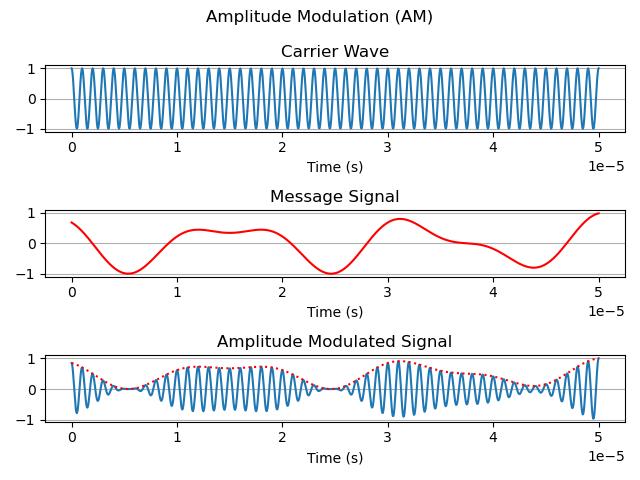

In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

fc = 1e6
n = 1000
t = np.linspace(0, 50 / fc, n)
mt = np.cos(2 * np.pi * (fc / 10) * t) + 2 * np.cos(2 * np.pi * (fc / 18) * t + (np.pi / 3))
mt = mt / np.max(np.abs(mt))
at = (mt + 1) / 2
ct = np.cos(2 * np.pi * fc * t)

fig, ax = plt.subplots(3, 1, layout='tight')

# Carrier signal plot
ax[0].plot(t, ct)
ax[0].grid(axis='y')
ax[0].set_xlabel('Time (s)')
ax[0].set_title('Carrier Wave')

# Message signal subplot
ax[1].plot(t, mt, 'r')
ax[1].grid(axis='y')
ax[1].set_xlabel('Time (s)')
ax[1].set_title('Message Signal')

# Modulated signal subplot
ax[2].plot(t, at * ct)
ax[2].plot(t, (mt + 1) / 2, 'r:')
ax[2].grid(axis='y')
ax[2].set_xlabel('Time (s)')
ax[2].set_title('Amplitude Modulated Signal')

fig.suptitle('Amplitude Modulation (AM)')
plt.show()

### Phase Modulation (PM)

In phase modulation (PM), rather than changing the amplitude of the carrier according to a message signal, we instead change the phase offset. Assuming our message signal, $m(t)$, is bounded to $[-1, 1]$, we can modulate the phase of the carrier to generate a modulated signal as:

$$
y(t) = A \cos( 2 \pi f_c t + \phi(t) )
$$

where

$$
\phi(t) = \pi m(t)
$$

In other words, the instantaneous phase offset of the carrier swings between $-\pi$ and $\pi$ radians as the message signal swings between -1 and 1, respectively.

In the time domain, the effect of phase modulation is much less pronounced than that of amplitude modulation. The example below shows the same message signal and carrier as used with the AM example, but this time modulated using PM:

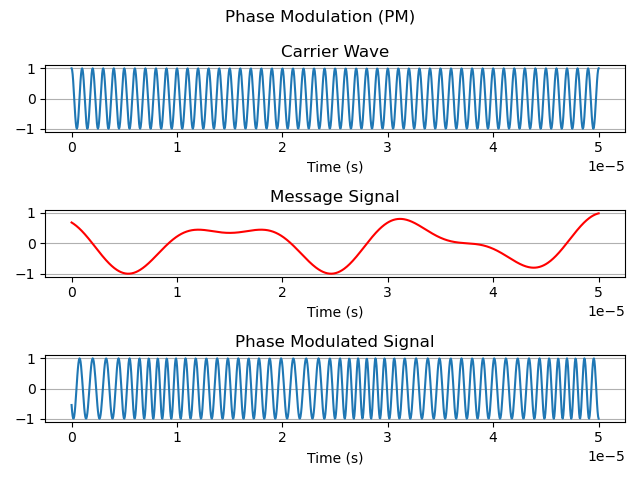

In [2]:
fig, ax = plt.subplots(3, 1, layout='tight')

# Carrier signal plot
ax[0].plot(t, ct)
ax[0].grid(axis='y')
ax[0].set_xlabel('Time (s)')
ax[0].set_title('Carrier Wave')

# Message signal subplot
ax[1].plot(t, mt, 'r')
ax[1].grid(axis='y')
ax[1].set_xlabel('Time (s)')
ax[1].set_title('Message Signal')

# Modulated signal subplot
ax[2].plot(t, np.cos(2 * np.pi * fc * t + np.pi * mt))
ax[2].grid(axis='y')
ax[2].set_xlabel('Time (s)')
ax[2].set_title('Phase Modulated Signal')

fig.suptitle('Phase Modulation (PM)')

plt.show()

Unlike AM, the effect of the modulation here is much less clear to the naked eye. However, we can at least see that when the message signal slopes downward, the modulated signal appears to have a slightly lower frequency, whereas when the message signal slopes upward, the modulated signal appears to have a slightly higher frequency. This makes sense - if the message signal increases, the phase offset increases. An increasing phase offset means that the sinuosoid is advancing through its cycles quicker. Conversely, a decreasing phase offset opposes the advancement of the sinusoidal cycle, thereby appearing as a decreased frequency.

### Frequency Modulation (FM)

As might be expected, frequency modulation (FM) is accomplished by modulating the instantaneous frequency of the carrier wave according to a message signal. Naively, one might expect that in order to modulate the frequency of the carrier, $c(t) = A \cos(2 \pi f_c t + \phi)$, you could simply replace $f_c$ with a time-varying offset from the center frequency, say $f_c + f_\Delta m(t)$.

To show why this does not work, let's take a look at the mathematical result of this first attempt:

$$
\begin{align}
y(t) &= A \cos(2 \pi (f_c + f_\Delta m(t)) t) \\
&= A \cos(2 \pi f_c t + 2 \pi f_\Delta m(t) t) \\
\end{align}
$$

The $2 \pi f_\Delta m(t) t$ term poses a problem. Because of the multiplication by $t$, the contribution of modulated term to the overall argument to the outer cosine function grows over time. In the plots below, this incorrect implementation is attempted. Notice that the areas of highest and lowest frequencies do not correspond to the highest and lowest points in the message signal. This approach is flawed.

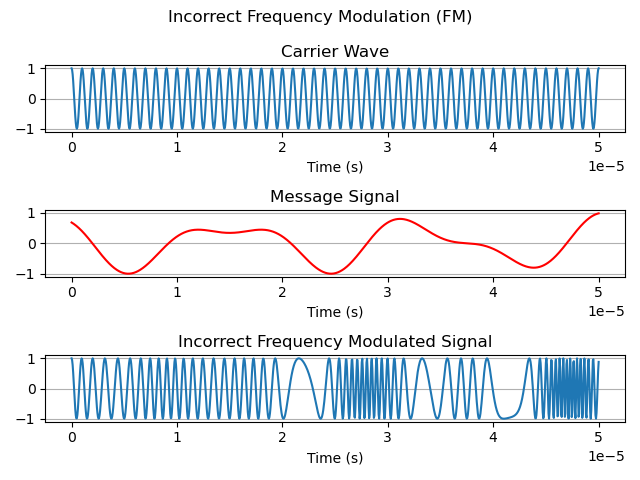

In [3]:
fig, ax = plt.subplots(3, 1, layout='tight')

# Carrier signal plot
ax[0].plot(t, ct)
ax[0].grid(axis='y')
ax[0].set_xlabel('Time (s)')
ax[0].set_title('Carrier Wave')

# Message signal subplot
ax[1].plot(t, mt, 'r')
ax[1].grid(axis='y')
ax[1].set_xlabel('Time (s)')
ax[1].set_title('Message Signal')

# Modulated signal subplot
ax[2].plot(t, np.cos(2 * np.pi * (fc + 100e3 * mt) * t))
ax[2].grid(axis='y')
ax[2].set_xlabel('Time (s)')
ax[2].set_title('Incorrect Frequency Modulated Signal')

fig.suptitle('Incorrect Frequency Modulation (FM)')

plt.show()

#### Back to Basics

To better understand how to correctly modulate an FM signal, let's take a step back and take a look at sinusoids more generally.

Consider a vector from the origin to some point on the unit circle, forming some angle, $\theta$, with the x-axis. This vector and its corresponding "x" and "y" components form a right triangle having a hypoteneuse of length 1. The side along the x-axis adjacent to the origin has a length of $\cos(\theta)$, while the side opposite the origin has a length of $\sin(\theta)$.

As the angle, $\theta$ increases, both the $\sin$ and $\cos$ components exhibit the familiar sinusoidal shape that we've become familiar with, as shown in the figure below:

interactive(children=(FloatSlider(value=0.0, description='Theta', max=12.566370614359172, step=0.0628318530717…

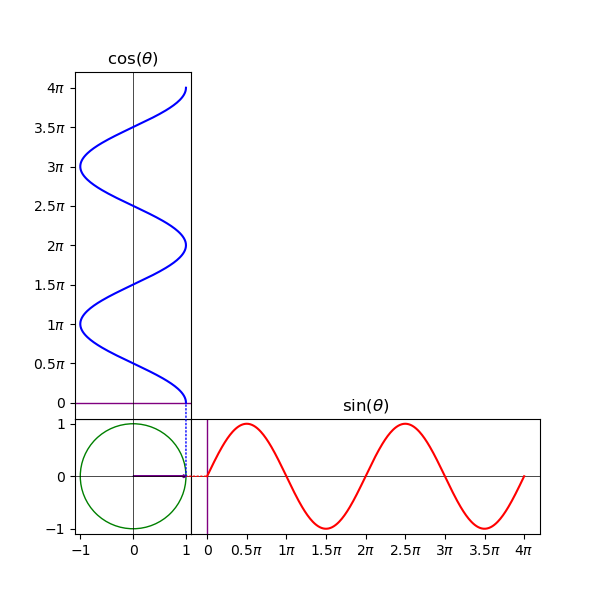

In [4]:
import matplotlib.patches
import matplotlib.path
import matplotlib.transforms
import matplotlib.animation
import matplotlib.ticker
from ipywidgets import interact, IntSlider, FloatSlider

# Create tick formatters/locators for displaying multiples of pi
pi_tick_formatter = matplotlib.ticker.FuncFormatter(
   lambda val,pos: '{:g}$\pi$'.format(val/np.pi) if val !=0 else '0'
)
pi_tick_locator = matplotlib.ticker.MultipleLocator(base=np.pi/2)

# Create a figure with 3 plots that share some axes
fig = plt.figure(figsize=(6, 6))
gs = fig.add_gridspec(2, 2, width_ratios=(1, 3), height_ratios=(3, 1), hspace=0, wspace=0)
ax = fig.add_subplot(gs[1, 0])
ax_cos = fig.add_subplot(gs[0, 0], sharex=ax)
ax_sin = fig.add_subplot(gs[1, 1], sharey=ax)

# Create the unit circle plot
theta = np.linspace(0, 4 * np.pi, 361)
ANGLE_PATCH_RADIUS = 0.4
circle_patch = matplotlib.patches.Circle((0, 0), 1, color='green', fill=False)
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.add_patch(circle_patch)
arrow_x = ax.arrow(0, 0, 0, 0,
         fc='blue', ec='blue', head_width=0.05, head_length=0.05, length_includes_head=True)
arrow_y = ax.arrow(0, 0, 0, 0,
         fc='red', ec='red', head_width=0.05, head_length=0.05, length_includes_head=True)
arrow_composite = ax.arrow(0, 0, 0, 0,
         fc='purple', ec='purple', head_width=0.05, head_length=0.05, length_includes_head=True)

# Create the sine plot
sin = np.sin(theta)
scrubber_sin = ax_sin.axvline(0, color='purple', linewidth=1)
ax_sin.xaxis.set_major_formatter(pi_tick_formatter)
ax_sin.xaxis.set_major_locator(pi_tick_locator)
ax_sin.axhline(0, color='black', linewidth=0.5)
ax_sin.yaxis.set_visible(False)
ax_sin.plot(theta, sin, 'r')
ax_sin.set_title('$\\sin(\\theta)$')

# Create the cosine plot
cos = np.cos(theta)
scrubber_cos = ax_cos.axhline(0, color='purple', linewidth=1)
ax_cos.yaxis.set_major_formatter(pi_tick_formatter)
ax_cos.yaxis.set_major_locator(pi_tick_locator)
ax_cos.axvline(0, color='black', linewidth=0.5)
ax_cos.xaxis.set_visible(False)
ax_cos.plot(cos, theta, 'b')
ax_cos.set_title('$\\cos(\\theta)$')

# Create the connection patches between axes
connector_sin = matplotlib.patches.ConnectionPatch((0, 0), (0, 0), "data", "data", axesA=ax, axesB=ax_sin, color='r', linestyle=':')
connector_cos = matplotlib.patches.ConnectionPatch((0, 0), (0, 0), "data", "data", axesA=ax, axesB=ax_cos, color='b', linestyle=':')
fig.add_artist(connector_sin)
fig.add_artist(connector_cos)

# Hacky way of creating a closure containing the current values of all
# the global variables that re referenced from the interaction update routine
# but might otherwise get overwritten in later cells
def mkclosure(
    fig=fig,
    scrubber_sin=scrubber_sin,
    scrubber_cos=scrubber_cos,
    arrow_x=arrow_x,
    arrow_y=arrow_y,
    arrow_composite=arrow_composite,
    connector_sin=connector_sin,
    connector_cos=connector_cos):

    # Redraw components that change when theta changes
    @interact(theta=FloatSlider(min=0, max=4 * np.pi, description='Theta', step=np.pi/50))
    def update(theta):
        x = np.cos(theta)
        y = np.sin(theta)
        scrubber_sin.set_xdata([theta, theta])
        scrubber_cos.set_ydata([theta, theta])
        arrow_x.set_data(x=0, dx=x)
        arrow_y.set_data(x=x, y=0, dy=y)
        arrow_composite.set_data(dx=x, dy=y)
        connector_sin.xy1 = x, y
        connector_sin.xy2 = theta, y
        connector_cos.xy1 = x, y
        connector_cos.xy2 = x, theta
mkclosure()

plt.show()


As we increase the phase angle from 0 to $2\pi$, we make a full rotation around the unit circle and the sine and cosine functions each make a full cycle (with the sine lagging $\pi/2$ radians behind the cosine). Consider what happens if we linearly increase the angle $\theta$ by some factor, k, over time:

$$
\theta(t) = kt
$$

In that case, we complete a full cycle every $2\pi/k$ seconds. It is easy to understand that if we increase $k$, the frequency at which the sinusoidal cycles complete increases, as shown in the plots below:

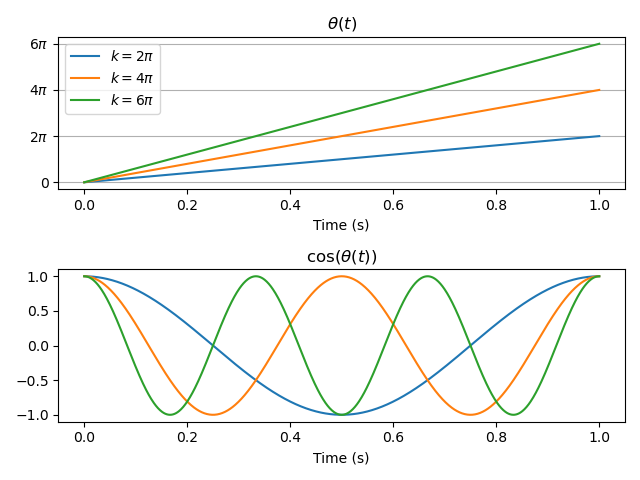

In [5]:
fig, ax = plt.subplots(2, 1, layout='tight')

# Add some labels
ax[0].set_title(r'$\theta(t)$')
ax[1].set_title(r'$\cos(\theta(t))$')
ax[0].set_xlabel('Time (s)')
ax[1].set_xlabel('Time (s)')

# Set y axis ticks relative to pi
pi_tick_locator = matplotlib.ticker.MultipleLocator(base=2*np.pi)
ax[0].yaxis.set_major_formatter(pi_tick_formatter)
ax[0].yaxis.set_major_locator(pi_tick_locator)
ax[0].grid(which='major', axis='y')

t = np.linspace(0, 1, 1000)
k = np.array([1, 2, 3])

for w in k:
    label = f'$k={w * 2}\\pi$'
    theta = 2 * np.pi * w * t
    ax[0].plot(t, theta, label=label)
    ax[1].plot(t, np.cos(theta), label=label)

ax[0].legend()

plt.show()

The faster we increase this phase angle, the quicker we complete cycles, and the higher the frequency of the sinusoid. The rate of change of the phase angle is directly proportional to the frequency. In fact, the instantaneous frequency, $f(t)$, of a sinusoid is given by the derivative of this phase angle over time:

$$
f(t) = \frac{1}{2 \pi} \frac{d}{dt} \theta(t)
$$

So, in order to manipulate the phase in such a way that we actually modulate the frequency, we must do the inverse operation of the above: integration.

$$
\theta(t) = 2 \pi \int_{0}^t f(\tau) d \tau
$$

Let's come back to our FM use case where we want to modulate the frequency of a carrier wave centered at $f_c$ by some message signal $m(t)$. Let's say that we want to moulate with a frequency deviation of $f_\Delta$ Hz. This means that an instantaneous message value of -1 should correspond to an instantaneous frequency of $f_c + f_\Delta$ Hz, while a message value of -1 should correspond to a frequency of $f_c - f_\Delta$ Hz. Our frequency modulation equation becomes:

$$
\begin{align}
y(t) &= \cos \left ( 2 \pi \int_{0}^t f(\tau) d \tau \right ) \\
&= \cos \left ( 2 \pi \int_{0}^t \left ( f_c + f_\Delta m(\tau) \right ) d \tau \right ) \\
&= \cos \left ( 2 \pi f_c t + 2 \pi f_\Delta \int_{0}^t m(\tau) d \tau \right )
\end{align}
$$

Seeing how this looks in the time domain:

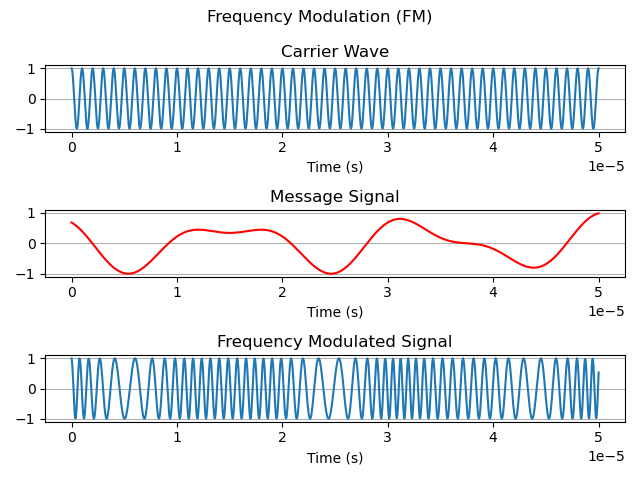

In [6]:
fig, ax = plt.subplots(3, 1, layout='tight')

t = np.linspace(0, 50 / fc, n)

# Carrier signal plot
ax[0].plot(t, ct)
ax[0].grid(axis='y')
ax[0].set_xlabel('Time (s)')
ax[0].set_title('Carrier Wave')

# Message signal subplot
ax[1].plot(t, mt, 'r')
ax[1].grid(axis='y')
ax[1].set_xlabel('Time (s)')
ax[1].set_title('Message Signal')

# Modulated signal subplot
mt_int = np.cumsum(mt) * (np.max(t) / n)
ax[2].plot(t, np.cos((2 * np.pi) * (fc * t + 500e3 * mt_int)))
ax[2].grid(axis='y')
ax[2].set_xlabel('Time (s)')
ax[2].set_title('Frequency Modulated Signal')

fig.suptitle('Frequency Modulation (FM)')

plt.show()

Much better! We can clearly see in this case that the frequency of the resulting signal is minimized when the message signal is minimized, and is lower in frequency that the original carrier wave. Conversely, when the message signal is at its maximum value, so too is the frequency of the modulated signal.

By the way, the integral makes this look more complicated than it really is. At the end of the day, FM really just amounts to an oscillator whose frequency is controlled by the message signal.

## Digital Modulation

Not surprisingly, digital modulation schemes convey digital data. This may include digitized voice, audio, video, text, files, network traffic, or any other form of digital data.

Digital modulation schemes are similar to their analog counterparts, except that rather than the message signal having a continuous range of values, it is quantized into discrete values. In many cases, there are only two such discrete values, and they directly correspond to binary bit values. However, in some modulation schemes, so-called "M-ary" values are used. For example, in an 8-ary scheme, there are 8 quantization states, where each state corresponds to three bits. Regardless of whether binary or M-ary, the modulated representations of the quantized states are also referred to as **symbols**.

Digital modulation can have a number of advantages over analog modulation:
- Can leverage digital encryption
- Can leverage digital data compression
- Can leverage digital error detection and correction
- Can more easily multiplex distinct streams over the same channel
- Degrades differently in the presence of noise (may be good or bad)

### Amplitude Shift Keying (ASK/OOK)

In its most basic form, amplitude shift keying represents binary ones as presence of a carrier and binary zeros as the lack of a carrier. This presence or lack of a signal is also known as on-off keying (OOK), and is also associated with Morse code.

The equations for the analog AM modulation scheme still applies to ASK, except that the message signal is quantized to -1s and 1s (or, 0s and 1s if you scale appropriately).

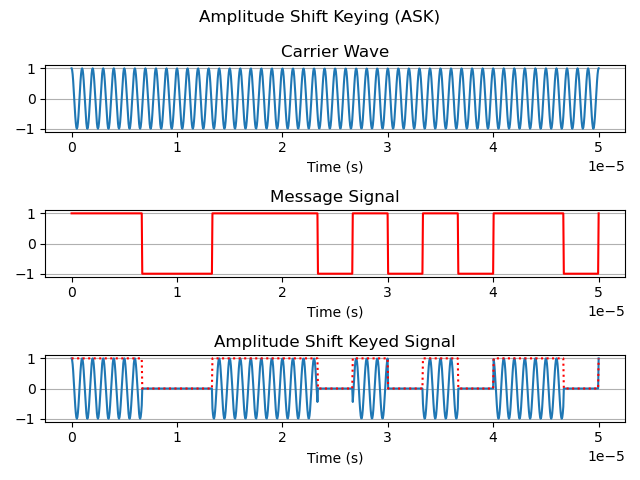

In [7]:
import scipy.interpolate

fc = 1e6
n = 1000
t = np.linspace(0, 50 / fc, n)
bits = np.unpackbits(np.asarray([0xce, 0xad], dtype=np.uint8))
mt = (scipy.interpolate.interp1d(np.linspace(0, 50 / fc, bits.size), bits, kind='zero')(t) * 2) - 1
at = (mt + 1) / 2
ct = np.cos(2 * np.pi * fc * t)

fig, ax = plt.subplots(3, 1, layout='tight')

# Carrier signal plot
ax[0].plot(t, ct)
ax[0].grid(axis='y')
ax[0].set_xlabel('Time (s)')
ax[0].set_title('Carrier Wave')

# Message signal subplot
ax[1].plot(t, mt, 'r')
ax[1].grid(axis='y')
ax[1].set_xlabel('Time (s)')
ax[1].set_title('Message Signal')

# Modulated signal subplot
ax[2].plot(t, at * ct)
ax[2].plot(t, (mt + 1) / 2, 'r:')
ax[2].grid(axis='y')
ax[2].set_xlabel('Time (s)')
ax[2].set_title('Amplitude Shift Keyed Signal')

fig.suptitle('Amplitude Shift Keying (ASK)')

plt.show()

As presented above, the sharp transitions result in short bursts of very high-bandwidth energy which can interfere with other channels. In real-world applications, the message signal is smoothed through a **pulse-shaping filter** before modulation in order to limit the bandwidth of the modulated signal.

The above example uses a binary ASK scheme. However, you could, for example, send your data in sets of 2 bits (4-ary ASK), where each combination of two bits is represented by one of four discrete amplitude levels. However, the more levels of quantization you allow, the more similar the symbols are, and the greater the chance of bit errors in discriminating between them.

### Frequency Shift Keying (FSK)

Frequency shift keying uses discrete frequencies to represent the quantized message values. For example, in a binary FSK scheme with a deviation, $f_\Delta$, of 5kHz, a -1 in the message signal would be represented by a sinusoid that is 5kHz less than the center frequency while a 1 in the message signal would be represented by a sinusoid that is 5kHz greater than the center frequency.

The following depicts an example of a binary FSK signal in the time domain:

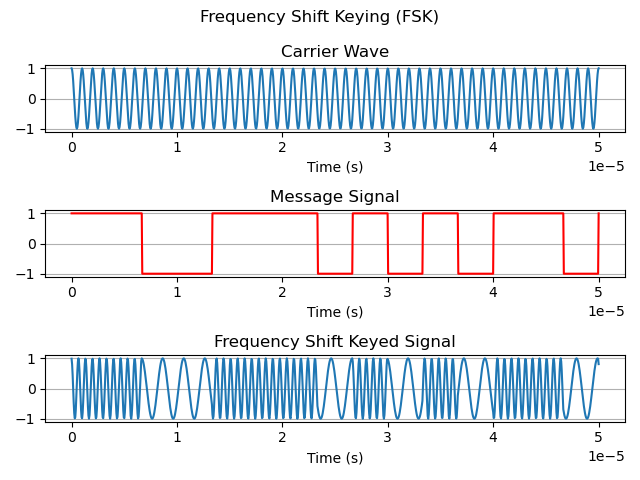

In [8]:
fig, ax = plt.subplots(3, 1, layout='tight')

# Carrier signal plot
ax[0].plot(t, ct)
ax[0].grid(axis='y')
ax[0].set_xlabel('Time (s)')
ax[0].set_title('Carrier Wave')

# Message signal subplot
ax[1].plot(t, mt, 'r')
ax[1].grid(axis='y')
ax[1].set_xlabel('Time (s)')
ax[1].set_title('Message Signal')

# Modulated signal subplot
mt_int = np.cumsum(mt) * (np.max(t) / n)
ax[2].plot(t, np.cos((2 * np.pi) * (fc * t + 500e3 * mt_int)))
ax[2].grid(axis='y')
ax[2].set_xlabel('Time (s)')
ax[2].set_title('Frequency Shift Keyed Signal')

fig.suptitle('Frequency Shift Keying (FSK)')

plt.show()

As with ASK, it is possible to make FSK into an M-ary modulation, where the groups of N bits correspond to $2^N$ evenly-spaced frequencies between $-f_\Delta$ and $f_\Delta$. Although this allows you to send more data per unit time, it also makes the symbols less distinguishable and therefore increases the error rate.

### Phase Shift Keying (PSK)

As with the other modulation types, the transition from the analog variant to the digital variant is very straightforward. In the binary case, a -1 in the message signal corresponds to a 0° phase shift, whereas a 1 corresponds to a 180° ($\pi$ radian) phase shift. The discrete changes in the phase make the time domain representation of PSK much more apparent than in the analog PM visualization (though, again, these sharp transitions are usually smoothed to limit the bandwidth of a signal).

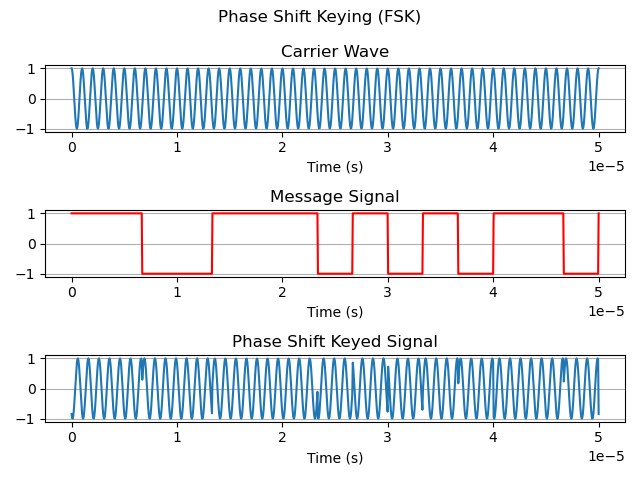

In [9]:
fig, ax = plt.subplots(3, 1, layout='tight')

# Carrier signal plot
ax[0].plot(t, ct)
ax[0].grid(axis='y')
ax[0].set_xlabel('Time (s)')
ax[0].set_title('Carrier Wave')

# Message signal subplot
ax[1].plot(t, mt, 'r')
ax[1].grid(axis='y')
ax[1].set_xlabel('Time (s)')
ax[1].set_title('Message Signal')

# Modulated signal subplot
ax[2].plot(t, np.cos(2 * np.pi * fc *t + (np.pi / 2 + mt)))
ax[2].grid(axis='y')
ax[2].set_xlabel('Time (s)')
ax[2].set_title('Phase Shift Keyed Signal')

fig.suptitle('Phase Shift Keying (FSK)')

plt.show()

The use of M-ary modulation schemes are particularly prevalent in PSK. For example, an 4-ary PSK modulation scheme (also called QPSK, for quadrature PSK) uses symbols that shift the phase by multiples of $\pi/2$. PSK symbols are often shown in the form of a **constellation diagram**, which is a polar plot showing the positions of the different symbols by their phase offset. Constellation diagrams for possible 2-, 4-, and 8-ary PSK are shown below.

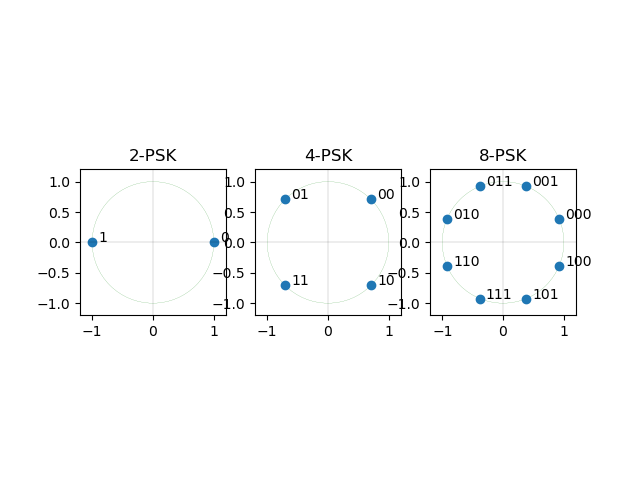

In [10]:
fig, ax = plt.subplots(1, 3)

def plot_constellation(ax, m):

    # Set up the axes
    lims = 1.2
    ax.set_aspect(1)
    ax.set_xlim([-lims, lims])
    ax.set_ylim([-lims, lims])
    ax.add_patch(matplotlib.patches.Circle((0, 0), 1, fill=False, linewidth=0.1, ec='g'))
    ax.axvline(0, color='k', linewidth=0.1)
    ax.axhline(0, color='k', linewidth=0.1)
    ax.set_title(f'{m}-PSK')

    # Plot the constellation points
    bitspersymbol = int(np.log2(m))
    phase = np.linspace(0, 2 * np.pi, m, endpoint=False) + (0 if m == 2 else np.pi / m)
    x = np.cos(phase)
    y = np.sin(phase)
    ax.scatter(x, y)

    # Generate graycodes and corresponding binary strings for labels
    syms = np.arange(0, m)
    graycodes = syms ^ (syms >> 1)
    graycode_strs = ['{0:0{1}b}'.format(code, bitspersymbol) for code in graycodes]
    for i, label in enumerate(graycode_strs):
        ax.annotate(label, (x[i] + 0.1, y[i]))

# Generate the plots
plot_constellation(ax[0], 2)
plot_constellation(ax[1], 4)
plot_constellation(ax[2], 8)
plt.show()

The specific angles and the associated binary values may vary between applications/implementations. However, it is common to see gray codes used in M-ary schemes. Gray codes only change one binary bit between adjacent symbols. This has the potential to reduce bit error rates because a symbol that is incorrectly identified as an adjacent symbol results in only a single bit error out of the $\log_2(M)$ bits in the symbol.

#### Variants

In addition to the M-ary aspect, PSK has a lot of common variants, including but not limited to:

- DPSK (Differential Phase Shift Keying)
    - Rather than the message data dictating the absolute phase, the message data determines a relative phase offset for the next transmitted symbol. This allows the receiver not to have to know the true phase/orientation of the signal - it only needs to care about the differences in phase observed during the transitions.
- $\pi/4$-QPSK
    - This scheme uses two separate QPSK constellations that are offset by $\pi/4$ from one another. Each transmitted symbol alternates which contellation is used. Because no two source and destination symbols during the transition can be directly across from one another, the signal never passes through the origin. This can limit voltage swings in analog path.
- QAM (Quadrature Amplitude Modulation)
    - In this scheme, the symbols vary not just by phase, but also by amplitude. Adjacent constellation points are further apart from one another than in an equivalent M-ary PSK scheme, making them more easily distinguishable and lessening the chance of errors. An example of a 16-QAM constellation is shown below.

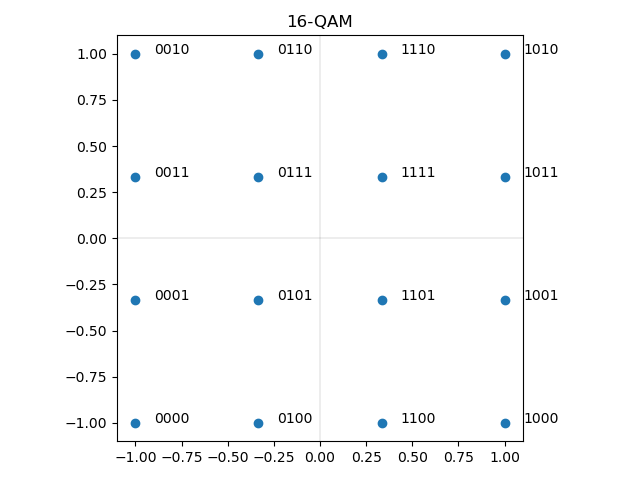

In [11]:
fig, ax = plt.subplots(layout='tight')

# Set up the axes
ax.set_aspect(1)
ax.axvline(0, color='k', linewidth=0.1)
ax.axhline(0, color='k', linewidth=0.1)
ax.set_title('16-QAM')

# Create the constellation points
m = 16
bitspersymbol = int(np.log2(m))
intervals = np.linspace(-1, 1, bitspersymbol)
x = intervals.repeat(bitspersymbol)
y = np.tile(np.concatenate((intervals, np.flip(intervals))), (int(bitspersymbol / 2)))
ax.scatter(x, y)

# Generate graycodes and corresponding binary strings for labels
syms = np.arange(0, m)
graycodes = syms ^ (syms >> 1)
graycode_strs = ['{0:0{1}b}'.format(code, bitspersymbol) for code in graycodes]
for i, label in enumerate(graycode_strs):
    ax.annotate(label, (x[i] + 0.1, y[i]))

plt.show()

## Mixing

Although radio frequencies are needed for transmitting radio waves over the air, they are not easy to work with directly:

- Analog design at high frequencies is very difficult, so we want to minimize the amount of processing done at RF
    - PCB design is challenging
    - Precision analog components that operate at high frequencies are expensive
- On the digital side, working directly at radio frequencies would require ADCs and DACs with extremely high sampling rates
    - This would also require CPUs with a *lot* of horsepower to process all those samples
- Demodulating signals would be very difficult
    - For example, for an FSK signal that deviates ±5 kHz from a center frequency at 100 MHz, this represents a delta of only ±0.005% of carrier frequency. Detecting such a subtle change directly at RF frequencies would be nearly impossible, at least in the analog domain.

A popular solution for dealing with these issues is to shift the signal of interest down in the frequency spectrum through a process called **mixing**. Mixing is based around the following trigonometric identity:

$$
cos(\theta)cos(\phi) = \frac{1}{2}cos(\theta - \phi) + \frac{1}{2}cos(\theta + \phi)
$$

If the angles $\theta$ and $\phi$ are varying over time, $t$, this becomes:

$$
cos(\theta(t))cos(\phi(t)) = \frac{1}{2}cos(\theta(t) - \phi(t)) + \frac{1}{2}cos(\theta(t) + \phi(t))
$$

Now, if the angles $\theta$ and $\phi$ are cycling at frequencies $f_1$ and $f_2$, respectively, then we get:

$$
\begin{aligned}
cos(2 \pi f_1 t)cos(2 \pi f_2 t) &= \frac{1}{2}cos(2 \pi f_1 t - 2 \pi f_2 t) &&+ \frac{1}{2}cos(2 \pi f_1 t + 2 \pi f_2 t) \\
&= \frac{1}{2}cos(2 \pi (f_1 - f_2)t) &&+ \frac{1}{2}cos(2 \pi (f_1 + f_2) t)
\end{aligned}
$$

In other words, if we multiply a signal of frequency $f_1$ by a signal of frequency $f_2$, we get two copies of the original signal (sometimes called **heterodynes**), each with half the amplitude:
- One at frequency $f_1 - f_2$
- One at frequency $f_1 + f_2$

We can use this principle to shift an RF signal centered at frequency $f_c$ down to a lower frequency, $f_c - f_{LO}$ by multiplying it with a locally-generated sinusoid of frequency $f_{LO}$. We can filter out the other copy at $f_c + f_{LO}$. The unwanted copy is called the **image**, and the process of filtering it out called **image rejection**.

This is a great time to introduce some additional new terminoloty: the generation of a locally-generated sinusoid is known as a **local oscillator**, abbreviated **LO**, and is frequently encountered in radio applications. Shifting a signal of interest down in frequency is also called **downconversion**.

An example of downconversion is shown below. Here, we take an RF signal of interest centered at 100 MHz and mix it with an LO of 90 MHz. We end up with two signals centered at 100±90 MHz. The signal at 10 MHz is typically easier to work with (requires less precise analog components, lower sample rates, etc.) than the original at 100MHz. The unwanted image at 190 MHz will typically be filtered out following the mixer stage.

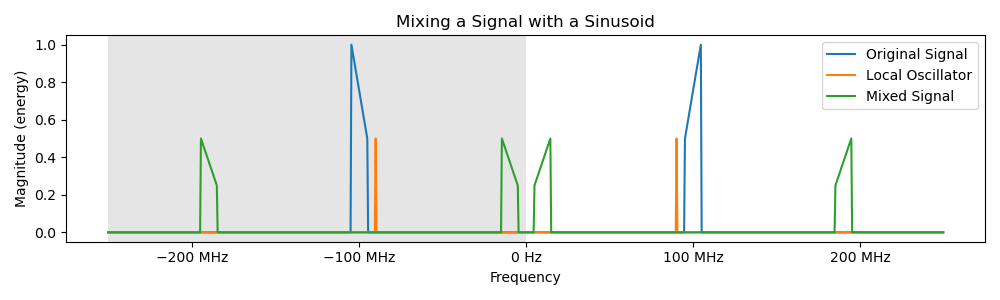

In [12]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft as fft
import scipy.signal as signal
import matplotlib.ticker
import IPython
from ipywidgets import interact, IntSlider, FloatSlider

freqFormatter = matplotlib.ticker.EngFormatter(unit='Hz')

n = int(1e3)
fs = int(500e6)
t = np.linspace(0, n / fs, n, endpoint=False)
fc = int(100e6)
bw = int(10e6)
flo = int(90e6)

# Create a signal with a distinct-looking, asymmetric spectrum
fstep = fs / n
passband_indices = np.arange(int((fc - bw / 2) / fstep), int((fc + bw / 2) / fstep))
passband_signal = np.interp(passband_indices, [passband_indices[0], passband_indices[-1]], [0.5, 1])
mf = np.zeros(n)
mf[passband_indices] = passband_signal
mf[-passband_indices] = passband_signal
mf *= mf.size
mt = fft.ifft(mf)

# Create a sinusoid to mix with
lo = np.cos(2 * math.pi * flo * t)

# Create the mixed signal
mixed = mt * lo

# Draw the figure
fix, ax = plt.subplots(figsize=(10, 3), layout='tight')
ax.xaxis.set_major_formatter(freqFormatter)
ax.magnitude_spectrum(mt, Fs=fs, window=matplotlib.mlab.window_none, sides='twosided', label='Original Signal')
ax.magnitude_spectrum(lo, Fs=fs, window=matplotlib.mlab.window_none, sides='twosided', label='Local Oscillator')
ax.magnitude_spectrum(mixed, Fs=fs, window=matplotlib.mlab.window_none, sides='twosided', label='Mixed Signal')
ax.axvspan(-fs/2, 0, facecolor='k', alpha=0.1)

ax.set_title('Mixing a Signal with a Sinusoid')
ax.legend()

plt.show()

### High-Side vs. Low-Side Injection

In the example above, we downconverted the signal by mixing the signal of interest with a sinusoid of a lower frequency. This is called **low-side injection**. It is also possible to downconvert the signal of interest by mixing with a higher-frequency sinusoid. This is called **high-side injection**. In the example below, we mix the 100 MHz signal of interest with a 110 MHz tone, rather than a 90 MHz tone, and still end up re-centering the signal at 10 MHz.

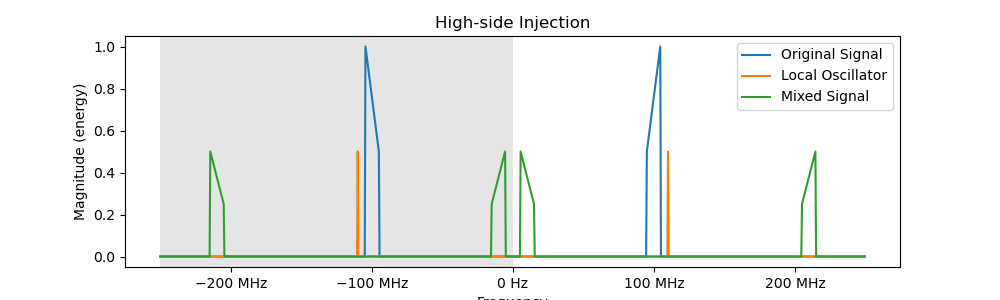

In [13]:
# Change the local oscillator to a frequency above the signal of interest
flo = int(110e6)

# Create a sinusoid to mix with
lo = np.cos(2 * math.pi * flo * t)

# Create the mixed signal
mixed = mt * lo

# Draw the figure
fix, ax = plt.subplots(figsize=(10, 3))
ax.xaxis.set_major_formatter(freqFormatter)
ax.magnitude_spectrum(mt, Fs=fs, window=matplotlib.mlab.window_none, sides='twosided', label='Original Signal')
ax.magnitude_spectrum(lo, Fs=fs, window=matplotlib.mlab.window_none, sides='twosided', label='Local Oscillator')
ax.magnitude_spectrum(mixed, Fs=fs, window=matplotlib.mlab.window_none, sides='twosided', label='Mixed Signal')
ax.axvspan(-fs/2, 0, facecolor='k', alpha=0.1)

ax.set_title('High-side Injection')
ax.legend()

plt.show()

Importantly, note that in this case, the spectrum of the downconverted signal is actually flipped from the original. This is because the $f_c - f_{LO}$ heterodyne actually winds up at 100 MHz - 110 MHz = -10 MHz. However, for real-valued signals, the frequency spectrum is always symmetric about 0 Hz. Thus, the -10 MHz gets reflected across the y-axis, so the resulting spectrum at 10 MHz is flipped.

This can perhaps be seen more easily by observing the effect of varying the LO frequency:

interactive(children=(FloatSlider(value=90000000.0, description='LO Frequency (Hz)', max=250000000.0, step=500…

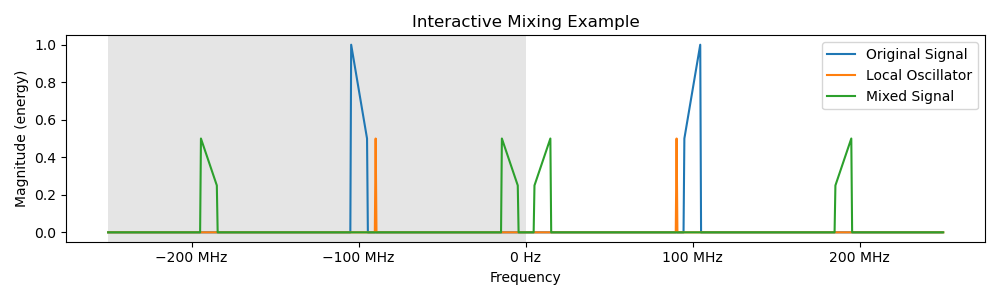

In [14]:
# Draw the figure
fig, ax = plt.subplots(figsize=(10, 3), layout='tight')
ax.xaxis.set_major_formatter(freqFormatter)
ax.magnitude_spectrum(mt, Fs=fs, window=matplotlib.mlab.window_none, sides='twosided', label='Original Signal')
ax.axvspan(-fs/2, 0, facecolor='k', alpha=0.1)

# Frequency axis values
f = np.linspace(-fs/2, fs/2, t.size)

# Calculate initial LO and mixed spectra
lo = np.cos(2 * math.pi * flo * t)
lof = np.abs(fft.fftshift(fft.fft(lo))) / n
mixedf = np.abs(fft.fftshift(fft.fft(lo * mt))) / n
line_lo, = ax.plot(f, lof, label='Local Oscillator')
line_mixed, = ax.plot(f, mixedf, label='Mixed Signal')
ax.set_title('Interactive Mixing Example')
ax.legend()

# Hacky way to create a closure to capture the current state of the
# global variables that the update routine needs to manipulate
def mkclosure(
    n=n,
    f=f,
    t=t,
    mt=mt,
    line_lo=line_lo,
    line_mixed=line_mixed):

    # Update function for interactivity
    @interact(flo=FloatSlider(value=90e6, min=0, max=fs/2, step=fs/n, description='LO Frequency (Hz)'))
    def update(flo):
        # Update LO, mixer output, and their spectra
        lo = np.cos(2 * math.pi * flo * t)
        lof = np.abs(fft.fftshift(fft.fft(lo))) / n
        mixedf = np.abs(fft.fftshift(fft.fft(lo * mt))) / n
        line_lo.set_data(f, lof)
        line_mixed.set_data(f, mixedf)

mkclosure()
plt.show()

Although these diagrams focus only on a specific signal of interest, keep in mind that the mixing operation is actually affecting the entire frequency spectrum. For example, if some other unwanted signal were present at 210 MHz in the example above, it would also get mixed down to 10 MHz and interfere with the the signal of interest. It is therefore important to bandpass filter the signal of interest before mixing to avoid this clobbering, in addition to filtering after mixing to eliminate unwanted images.

Understanding the effects of mixing (and, in some cases, aliasing) on both the desired and unwanted signals, and selecting appropriate LO frequencies, filters, sample rates, and injection types to suit your application is called **frequency planning**.

By the way, we can (and do) also use mixing for bringing a signal up in frequency - **upconversion**. This is used on the transmitter side to translate a baseband signal up to an RF range (perhaps by way of an intermediate frequency, which we'll discuss in superheterodyning).

## Mixing at Baseband

When a signal of interest is spectrally centered at 0 Hz, we say that it is at **baseband**. Working with signals at baseband is desirable for a variety of reasons: it requires a lower sample rate, it decouples the carrier wave from the modulation scheme, and it is easier to modulate and demodulate the signals.

Unfortunately, as observed in the interactive mixing graph, above, mixing a signal all the way down to 0 Hz has an issue: the signal folds over the frequency axis and adds onto itself, and we have lost information. One of the ways around this issue is to leverage quadrature signals.

# Quadrature Signals and IQ Sampling

A sinusoid of any arbitrarily amplitude and phase can be synthesized (created) from or analyzed (decomposed) into two scaled sinusoids of the same frequency that are 90° out of phase with one another; namely a sine and a cosine. When a signal is decomposed in this manner, we refer to the resulting representation as a **quadrature signal**. In fact, this analysis is similar to what takes place in a DFT. In a DFT, a time-domain signal is analyzed into a *set* of sine and cosine basis functions with different coefficients. The cosine components form the "real" part of signal in the Fourier domain, while the sine components form the "imaginary" part of the signal. The same is true with quadrature signal analysis, except that only a *single* pair of sine and a single cosine function are used as the basis functions.

By convention, the cosine (or "real") component of a quadrature signal is called the **in-phase** component, and its coefficient is called $I$. The sine (or "imaginary") component is called the **quadrature** component, and its coefficient is called $Q$. When we deal with these signals in discrete time, the $I$ and $Q$ pairs are often referred to a **IQ samples**. IQ samples are generally stored as complex values, and are visualized as points on the complex plane.

To see how we can generate a sinusoid with an arbitrary phase and frequency from a single sine and cosine, refer to the interactive plot below. This plot shows how manipulating the $I$ and $Q$ coefficients affects the synthesized signal.

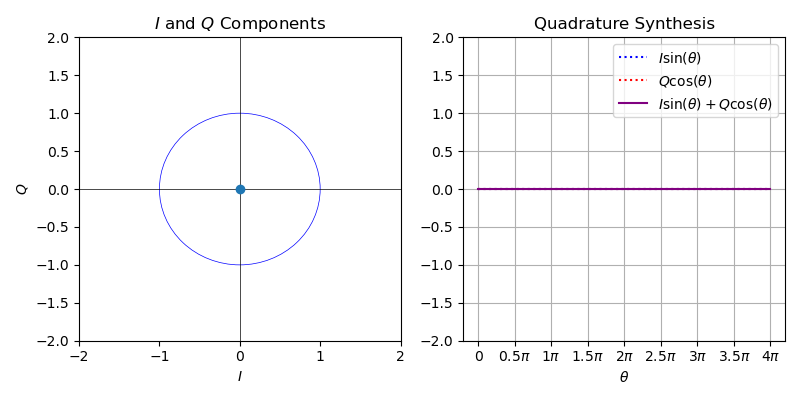

In [16]:
theta = np.linspace(0, 2 * np.pi * 2, 1000)

ax_lim = 2
fig, ax = plt.subplots(1, 2, figsize=(8, 4), layout='tight')
ax_quad, ax_time = ax

# Create time domain plot
line_i, = ax_time.plot(theta, np.zeros(theta.size), ':b', label=r'$I\cos(\theta)$')
line_q, = ax_time.plot(theta, np.zeros(theta.size), ':r', label=r'$Q\sin(\theta)$')
line_sum, = ax_time.plot(theta, np.zeros(theta.size), 'purple', label=r'$I\cos(\theta) + Q\sin(\theta)$')
basis_i = np.cos(theta)
basis_q = np.sin(theta)
ax_time.set_ylim((-ax_lim, ax_lim))
ax_time.grid(axis='both')

pi_tick_locator = matplotlib.ticker.MultipleLocator(base=np.pi/2)
ax_time.xaxis.set_major_formatter(pi_tick_formatter)
ax_time.xaxis.set_major_locator(pi_tick_locator)
ax_time.set_xlabel('$\\theta$')
ax_time.set_title('Quadrature Synthesis')
ax_time.legend(loc='upper right')

# Create quadrature domain plot
ax_quad.add_patch(matplotlib.patches.Circle((0, 0), 1, fill=False, ec='b', lw=0.5))
ax_quad.set_xlim((-ax_lim, ax_lim))
ax_quad.set_ylim((-ax_lim, ax_lim))
ax_quad.axhline(0, color='k', lw=0.5)
ax_quad.axvline(0, color='k', lw=0.5)
point_quad, = ax_quad.plot([0], [0], 'o')
ax_quad.set_xlabel('$I$')
ax_quad.set_ylabel('$Q$')
ax_quad.set_title('$I$ and $Q$ Components')

# Hacky way to create a closure to capture the current set of the
# global variables that the update routine intends to manipulate
def mkclosure(
    fig=fig,
    ax_quad=ax_quad,
    basis_i=basis_i,
    basis_q=basis_q,
    theta=theta,
    line_i=line_i,
    line_q=line_q,
    line_sum=line_sum,
    point_quad=point_quad):

    is_mouse_down = False

    def update_iq(i, q):
        i_theta = i * basis_i
        q_theta = q * basis_q
        line_i.set_data(theta, i_theta)
        line_q.set_data(theta, q_theta)
        line_sum.set_data(theta, i_theta + q_theta)
        point_quad.set_data([i], [q])

    def on_press(event):
        if event.inaxes == ax_quad:
            nonlocal is_mouse_down
            is_mouse_down = True
            update_iq(event.xdata, event.ydata)

    def on_release(event):
        if event.inaxes == ax_quad:
            nonlocal is_mouse_down
            is_mouse_down = False

    def on_move(event):
        if is_mouse_down:
            update_iq(event.xdata, event.ydata)

    fig.canvas.mpl_connect('motion_notify_event', on_move)
    fig.canvas.mpl_connect('button_press_event', on_press)
    fig.canvas.mpl_connect('button_release_event', on_release)

mkclosure()
plt.show()

Clearly, setting $I=1$ and $Q=0$ simply results in a cosine wave with 0° phase offset. Similarly, setting $I=0$ and $Q=1$ results in a cosine wave with a $\pi/2$ (or, 90°) phase offset - a sine wave. If we set a mixture somewhere in between, we can generate a sinusoid with an arbitrary phase between 0 and $\pi/2$. More generally, the phase and amplitude of the resulting sinusoid directly correspond to the angle and radius to the IQ point in the complex plane, and are given by:

$$
\begin{align}
\text{phase} &= \text{atan2}(Q, I) \\
\text{magnitude} &= \sqrt{I^2 + Q^2}
\end{align}
$$

where $\text{atan2}()$ is the four-quadrant arctangent function.

Okay, but why is that useful? Well, recall that multiplication with a sinusoid is exactly what mixing is. Instead of the abstract $I\sin(\theta)$ and $Q\cos(\theta)$ above, suppose that $I$, $Q$, and $\theta$ are all functions of time. Specifically, suppose that $\theta(t) = 2 \pi f_c t$ is a signal from some LO, and that $I(t)$ and $Q(t)$ are provided by software through a DAC. In block diagram form, it looks something like this:

![Quadrature Modulation](images/quadrature_mixing.drawio.svg)

$I(t)$ and $Q(t)$ give the software control over the phase and amplitude of the sinusoid. As we've seen in the modulation section, setting the amplitude and phase is all we need in order to implement any of the fundamental modulation types. Mixing with the LO shifts the baseband data up to some RF frequency, $f_c$. This gives us the ability to implement just about any modulation scheme at any carrier frequency. The block above is known as a quadrature modulator, or quadrature mixer.

Note that the modulation is also completely decoupled from the carrier frequency. If we want to transmit on another frequency, we can simply adjust the LO to a different carrier frequency without having to change the $I$ and $Q$ signals performing the modulation. Furthermore, the DAC only needs to be capable of handling the comparably low frequency of message signal modulation; it does not need to operate at RF frequencies.

At the receiver, we can perform quadrature analysis as shown below to get a stream of IQ data from a real signal source:

![Quadrature Analysis](images/quadrature_analysis.drawio.svg)

If it's helpful, you can think of also think of quadrature analysis as correlation: the $I$ channel is simply the cross-correlation of the input signal with a cosine wave of some frequency (typically, the carrier frequency), while the $Q$ channel is simply the cross-correlation of the input signal with a sine wave of the same frequency.

## Quadrature Mixing and Baseband

Recall that mixing a signal all the way down to 0 Hz caused aliasing and loss of information. However, when using the quadrature mixer configurations above, that's exactly what we're doing: we're setting the LO to the carrier frequency so that we can translate the signal between RF (or IF) and baseband.

How does this work if we're losing information in the mixing? The short, hand-wavy answer is: orthogonality. The result of the mix with the cosine is orthogonal to the mix with the sin. Although each individual leg loses some data, each leg also has information that the other leg does not. When taken in aggregate, we have not actually lost any information. For a better explanation, refer to the "Quadrature Signals: Complex, But Not Complicated" reference in the Further Reading section.

## Modulation and Demodulation with Quadrature Signals

### AM and ASK

We've seen that we can modulate the amplitude of a sinusoid by varying the $I$ and $Q$ values that we mix with it. The amplitude of the resulting sinusoid will be $\sqrt{I^2 + Q^2}$. Of course, there are inifinite possible combinations of $I$ and $Q$ values that can achieve any given desired amplitude. However, we can make our lives easy by simply holding the $Q$ component at zero. In this case, the value of $I$ directly sets the amplitude of the output signal.

If we want to modulate the amplitude over time according to some message signal, $m(t)$ (assumed to be bound to [-1, 1]), we need only set:

$$
\begin{align}
Q(t) &= 0 \\
I(t) &= \frac{m(t) + 1}{2}
\end{align}
$$

Note that the scaling is only necessary to avoid "negative" amplitudes. If $m(t)$ is already bound to [0, 1], then the scaling is unnecessary, and this simplifies to:

$$
\begin{align}
Q(t) &= 0 \\
I(t) &= m(t)
\end{align}
$$

On the receive side, we are not guaranteed that our oscillators are exactly in phase (or, for that matter, exactly the same frequency, but that's a separate matter) with those at the transmitter. In fact, even if they were, the propagation delay over-the-air will mean that the signal at the receiver will be out-of-time with the transmitter, and a shift in the time domain manifests as a shift in phase in the frequency domain. Therefore, the received signal will almost certainly have some phase offset applied. For example, the transmitter might transmit the signal as shown on the left side of the diagram below, but the receiver may receive it as shown on the right side.

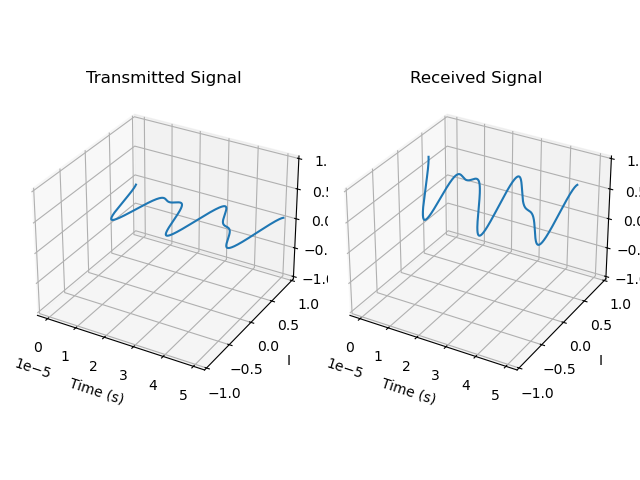

In [17]:
n = 1000
fc = 1e6
n = 1000
phi = np.array([0, np.pi / 3])
t = np.linspace(0, 50 / fc, n)
mt = np.cos(2 * np.pi * (fc / 10) * t) + 2 * np.cos(2 * np.pi * (fc / 18) * t + (np.pi / 3))
mt = mt / np.max(np.abs(mt)) # Normalize to [-1, 1]
mt = (mt + 1) / 2 # Offset and scale to [0, 1]

fig, axes = plt.subplots(1, phi.size, subplot_kw=dict(projection='3d'), layout='tight')

for i, ax in enumerate(axes):
    mt_offset = mt * np.exp(1j * phi[i])
    ax.plot(t, np.real(mt_offset), np.imag(mt_offset))
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('I')
    ax.set_zlabel('Q')
    ax.set_ylim(-1, 1)
    ax.set_zlim(-1, 1)
    ax.set_title(f"{'Transmitted' if i == 0 else 'Received'} Signal")

plt.show()

This is no problem, though. The phase is not really significant in AM. Regardless of the phase, the receiver can demodulate the original message simply by computing the magnitude of the received signal over time:

$$
\begin{align}
m(t) = \sqrt{I(t)^2 + Q(t)^2}
\end{align}
$$

### PM and PSK

We've seen that the selection of $I$ and $Q$ allows us to set the phase of the output signal. If we want to modulate the phase over time according to a message signal $m(t)$, it's simply a matter of computing the $\cos$ and $\sin$ components of the desired phase angle. Recall from before that the phase angle in PM is typically just a scaled version of the message signal from $[-\pi, \pi]$. Thus, to transmit a message using PM/PSK we arrive at:

$$
\begin{align}
I(t) &= \cos(\pi m(t)) \\
Q(t) &= \sin(\pi m(t))
\end{align}
$$

As we've already seen, the instantaneous phase of the signal is given by $\text{atan2}(Q, I)$. Thus, on the receive side, demodulating the message from the IQ data is simply performed by:

$$
m(t) = \frac{1}{\pi}\text{atan2}\left(Q(t), I(t)\right)
$$

It is worth noting that plotting I and Q in the complex plane provides a direct visual of the phase. This especially shines in the case of PSK, where the IQ samples essentially form the contellation points of the PSK scheme. For example, a QPSK signal might look something like the graph below:

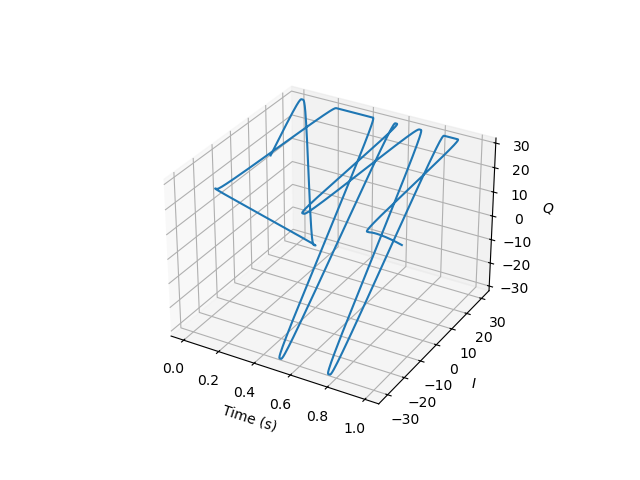

In [18]:
n = 1000
t = np.linspace(0, 1, n)

# Create a QPSK signal
bits_i = np.unpackbits(np.asarray([0xde, 0xad], dtype=np.uint8))
bits_q = np.unpackbits(np.asarray([0xbe, 0xef], dtype=np.uint8))
i = (scipy.interpolate.interp1d(np.linspace(0, 1, bits.size), bits_i, kind='zero')(t) * 2) - 1
q = (scipy.interpolate.interp1d(np.linspace(0, 1, bits.size), bits_q, kind='zero')(t) * 2) - 1
iq = i + 1j * q

# Apply some pulse shaping
pulse_shaping_filter = np.hanning(n / bits.size)
iq_shaped = np.convolve(iq, pulse_shaping_filter, mode='same')

# Draw the plot
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.plot(t, np.real(iq_shaped), np.imag(iq_shaped))
ax.set_xlabel('Time (s)')
ax.set_ylabel('$I$')
ax.set_zlabel('$Q$')
plt.show()

In the AM example, we talked about the receive side not caring if there is a phase offset between the transmitter and the receiver, as all of the message information is in the amplitude. In the case of PM/PSK, the information is in the phase, so a phase offset cannot be tolerated. A couple of possible ways to deal with this phase offset include:

- Have the transmitter send a side-channel signal such as a "pilot" tone that provides a phase reference against which the received phase can be compared
- Use a differential PSK scheme so that the information is coded in the phase changes, rather than the absolute phase. The phase offset then becomes irrelevant.

### FM and FSK

During the previous look at FM, we concluded that the key to modulating with FM is realizing that frequency is really the rate of change of the phase: if we increment the phase quickly we generate a higher frequency; if we incremeent the phase slowly, we generate a lower frequency. In the quadrature domain, we actually have negative frequencies as well: if we decrement the phase slowly, we generate a low *negative* frequency; if we decrement the phase quickly, we generate a higher *negative* frequency.

This is easiest to think about in the FSK case. Consider an FSK modulation scheme with center frequency $f_c$ and frequency deviation $f_\Delta$. A digital zero would be represented with frequency $f_c - f_\Delta$ while a digital one would be represented with frequency $f_c + f_\Delta$. In the RF passband range, both of these symbols would correspond to positive frequencies surrounding the carrier frequency. However, at baseband, $f_c$ is zero, so the symbols are represented with frequencies $-f_\Delta$ and $+f\Delta$. Recall that, when working with real signals, the frequency spectrum has even symmetry for the magnitudes and odd symmetry for the phases. A frequency of $-f_\Delta$ and a frequency of $+f_\Delta$ would be exactly the same, so the two symbols would be indistinguishable. Quadrature signals, on the other hand, open up the negative frequency spectrum. We can uniquely represent, and distinguish between, $-f_\Delta$ and $+f_\Delta$.

This point is illustrated in the plots below. In the two left columns, we see the spectra of two "real" sinusoids at frequencies of 100 kHz and -100 kHz. The two are indistinguishable. Note also that these magnitude plots exhibit even symmetry while the phase plots exhibit odd symmetry. In contrast, the two right columns show the sprecta of two "complex" sinusoids generated via quadrature signals. Here, we see that quadrature signals do not have symmetry in their spectra and that we can easily distinguish the -100 kHz sinusoid from the 100 kHz sinusoid.

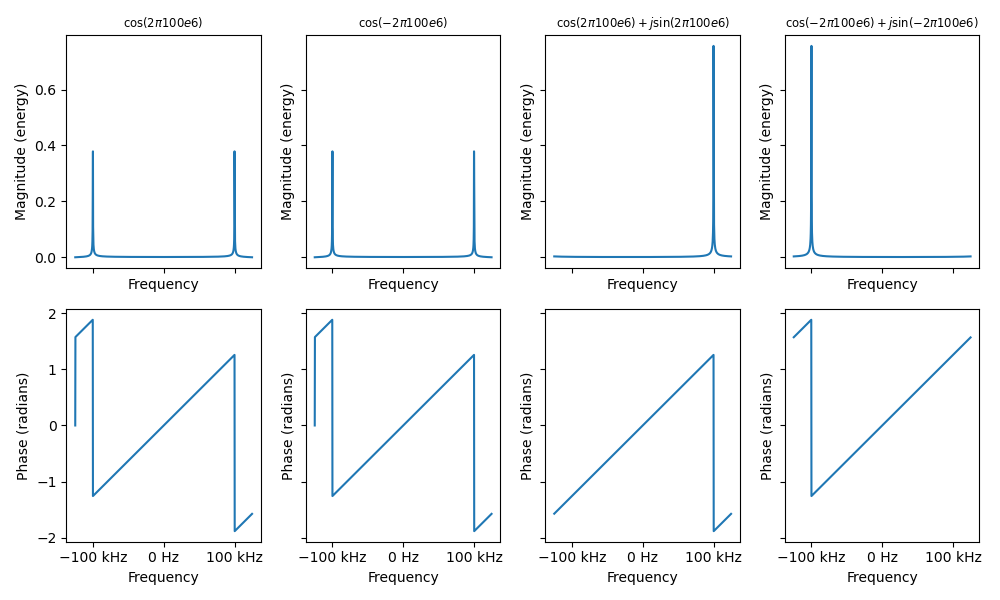

In [19]:
n = 1000
fc = 100e3
fs = 250e3
t = np.linspace(0, n / fs, n)

plots = [
    {
        'data': np.cos(2 * np.pi * fc * t),
        'name': r'$\cos(2 \pi 100e6)$'
    },
    {
        'data': np.cos(-2 * np.pi * fc * t),
        'name': r'$\cos(-2 \pi 100e6)$'
    },
    {
        'data': np.exp(1j * 2 * np.pi * fc * t),
        'name': r'$\cos(2 \pi 100e6) + j \sin(2 \pi 100e6)$'
    },
    {
        'data': np.exp(1j * -2 * np.pi * fc * t),
        'name': r'$\cos(-2 \pi 100e6) + j \sin(-2 \pi 100e6)$'
    },
]

fig, ax = plt.subplots(2, len(plots), sharex='col', sharey='row', figsize=(10, 6), layout='tight')

for i, plot in enumerate(plots):
    ax[0, i].magnitude_spectrum(plot['data'], Fs=fs, window=matplotlib.mlab.window_none, sides='twosided')
    ax[1, i].phase_spectrum(plot['data'], Fs=fs, window=matplotlib.mlab.window_none, sides='twosided')
    ax[0, i].xaxis.set_major_formatter(freqFormatter)
    ax[1, i].xaxis.set_major_formatter(freqFormatter)
    ax[0, i].set_title(f"{plot['name']}", size='small')

plt.show()

The plot below shows how tones of $-f_\Delta$ and $+f_\Delta$ are visualized as quadrature signals. Here, we can see that in the $f_\Delta$ case, the phase is *increasing* over time. In the $-f_\Delta$ case, the phase is *decreasing* over time.

C:\Users\Frank\AppData\Local\Temp\ipykernel_7428\1747837734.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(1, f.size, subplot_kw=dict(projection='3d'), layout='tight')


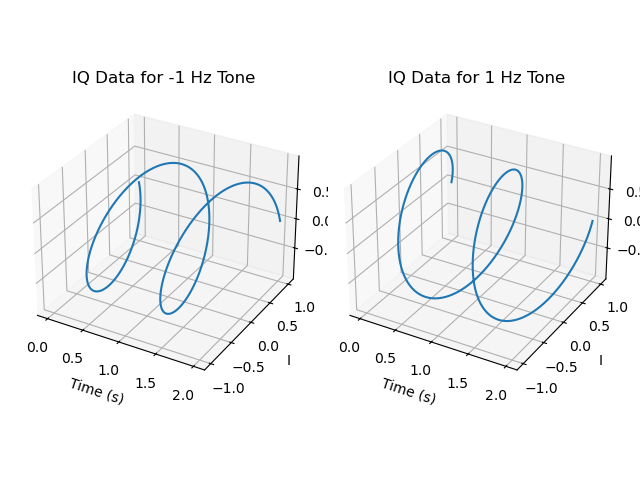

In [20]:
n = 1000
t = np.linspace(0, 2, n)
f = np.array([-1, 1])
theta = 2 * np.pi * t

fig, axes = plt.subplots(1, f.size, subplot_kw=dict(projection='3d'), layout='tight')
for i, ax in enumerate(axes):
    ax.plot(t, np.cos(f[i] * theta), np.sin(f[i] * theta))
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('I')
    ax.set_zlabel('Q')
    ax.set_title(f"IQ Data for {f[i]} Hz Tone")

plt.show()

At the transmitter, then, to modulate an FM signal at baseband, we simply increment or decrement the phase over time proportionally to the message signal. For continuous signals, this looks like:

$$
\begin{align}
I(t) &= \cos \left (2 \pi f_\Delta \int_{0}^t m(\tau) d \tau \right ) \\
Q(t) &= \sin \left (2 \pi f_\Delta \int_{0}^t m(\tau) d \tau \right )
\end{align}
$$

The integrals look a little scary, but in discrete time, this becomes:

$$
\begin{align}
I[n] &= \cos \left (2 \pi \frac{f_\Delta}{f_s} \sum_{k=0}^n m(n) \right ) \\
Q[n] &= \sin \left (2 \pi \frac{f_\Delta}{f_s} \sum_{k=0}^n m(n) \right )
\end{align}
$$

We can further simplify this into recursive equations:

$$
\begin{align}
I[n] &= \cos \left (2 \pi \frac{f_\Delta}{f_s} \left( m[n] + m[n - 1] \right) \right ) \\
Q[n] &= \sin \left (2 \pi \frac{f_\Delta}{f_s} \left( m[n] + m[n - 1] \right) \right )
\end{align}
$$

On the receive side, we can determine the frequency by performing the inverse operation: taking the derivative of the phase. In discrete time, the derivative is simply the difference between the current sample and the previous sample. To recover the message signal, we simply do:

$$
m[n] = \frac{f_s}{2 \pi f_\Delta} \left( \text{atan2} \left( Q[n], I[n] \right) - \text{atan2} \left( Q[n-1], I[n-1] \right) \right)
$$

Note that, because the information is in the rate of change of the phase, and not the absolute phase itself, any phase offset between the transmitter and receiver does not adversely affect the ability to demoulate the FM signal.

# Radio Architectures

There are several common radio architectures used in software-defined radio. The sections that follow show a few fundamental architectures, though many additional variants are possible. The diagrams and descriptions illustrate the receive side, but the transmit side is a more-or-less symmetric version of these, with the LNA replaced by a PA, and the ADC replaced by a DAC.

## Superheterodyne

The superheterodyne architecture is the classic, tried-and-true radio architecture. Although this architecture predates SDR and was used for a long time for analog radios, it is just as applicable to SDRs. One of the common problems that we face with radio frequencies is that we typically have some signal of interest may have a bandwidth that is orders of magnitude less than the carrier frequency that it is riding on. For example, if we have a 1 MHz wide signal centered at 1 GHz. To filter that out effectively in the analog domain, we would need to create a filter whose bandwidth is 0.1% of the center frequency. Creating filters that narrow and that accurate at such high frequencies is difficult and expensive.

The superheterodyne architecture's solution to this problem is to use a much broader, less accurate filter, and then mix the resulting signal down to a lower frequency. For example, in our example above where $f_c$ = 1 GHz and BW = 1 MHz, we might create a bandpass filter that is, say, 20 MHz wide centered at 1 GHz. Such a filter requires only 1/20th of the precision of the original. We can then use mixing to re-center this filtered signal to a lower frequency. Since there is some filter rolloff, we should allow some clearance around the band edges. We might choose re-center the signal at 15 MHz, for example.

A simplified superheterodyne recevier is shown in the diagram below. The bandpass filter in the RF domain provides some coarse filtering of the signal of interest. This signal is mixed down to an IF where it is easier to perform additional filtering, gain staging, or other analog processing. The signal then goes through a low-pass filter, which serves double-duty as an image rejection filter and an antialising filter. The signal is now conditioned for sampling through an ADC. A separate quadrature mixing step occurs in the digital domain to bring the IF signal down to complex baseband.

![Superheterodyne receiver architecture](images/superheterodyne.drawio.svg)

It is common for a design to use mutiple mixing stages to provide even better selectivity, distribute the gain more evenly, use lower tolerance components, or use a lower sampling rate. In our example above, our signal was only 1 MHz wide, but because we our "more relaxed" filtering only limited the bandwidth to 20 MHz (plus some rolloff) centered at 15 MHz, we have about 30 MHz of signal and must therefore sample at at least 60 MHz (probably more to account for rolloff). We can do much better by using multiple mixing stages. For example, we might use 3 mixing stages, looking something like this (this selection of IFs is fairly arbitrary):

- Bandpass filter to 100 MHz centered at 1 GHz (a generous 10% of the carrier frequency, allowing the use of cheap, low-tolerance analog components)
- Downconvert this 100 MHz BW signal to recenter at 75 MHz
- Bandpass filter to 10 MHz around 75 MHz
- Downconvert this 10 MHz BW signal to recenter at 7.5 MHz
- Bandpass filter to 2 MHz around 7.5 MHz
- Downconvert this 2 MHz BW signal to recenter at 1.5 MHz
- Low-pass filter this signal with a cutoff of 3 MHz
- Sample with the ADC at 6 MHz

With this setup, we've cut our sample rate by a factor of 10 compared to the single-stage design, resulting in lower power consumption and less CPU processing power to deal with the sampled signal.

The primary advantage of the superheterodyne design is its excellent selectivity and linearity. It allows us to use cheap, simple filters. Because we can distribute the analog signal processing across multiple stages, we can also use components that are only designed to be linear only in a narrow range (again, cheaper), rather than an ultra wide range. The disadvantage of this design is the relative complexity and high component count, which can be a problem where SWaP is a concern.

## Direct Sampling (RF Sampling)

The direct sampling architecture is, in some ways, the simplest and most straightforward architecture. There is just enough analog processing to filter the band containing a signal of interest and then amplify the signal to an appropriate level for the ADC. Downconverting a particular channel down to baseband uses a quadrature mixing operation completely in the digital domain. This mixing uses a numerically-controlled oscillator (NCO) as the LO. All of this processing is typically done in digital hardware before the software receives the IQ samples.

![Direct sampling receiver architecture](images/direct_sampling.drawio.svg)

The main advantage of the direct sampling architecture are that it uses fewer components and suffers less from inaccuracies from analog circuitry than the other radio architectures. On the other hand, because there is no downconversion in the analog domain, the limited analog processing is all performed at RF. This means that we need analog parts that behave linearly across a wide range of frequencies. Also, because of the challenge of implementing tunable filters that accurate, linear, and narrow in the RF range, we may compromise for wider analog filter bandwidths, requiring higher sampling rates to capture correctly, and more processing power in the digital domain for additional filtering.

## Direct Conversion (a.k.a Homodyne, a.k.a Zero-IF)

The direct conversion architecture has a similar topology to the direct sampling architecture, except that the quadrature mixing is performed in the analog domain, and there are two ADCs: one for I and one for Q.

![Direct conversion receiver architecture](images/direct_conversion.drawio.svg)

In some ways, this design is almost a hybrid of the two above. It requires fewer analog components than the superheterodyne receiver, but more than the direct sampling receiver. Because the the mixing step takes place in the analog domain, the signal of interest is already at baseband before hitting the ADCs. This can allow for lower sampling rates relative to superheterodyne (where we need a wide enough bandwidth to capture the signal spectrum centered at the IF) and the direct sampling receiver (where we likely have a relatively wide bandwidth coming in due to analog filtering limitations). One of the major issues with direct conversion is that, because the I and Q paths are implemented in the analog domain, they are victim to analog component tolerances and will have inherent imbalances. Even small imbalances between the I and Q channels can result in problems such as incomplete image rejection and DC offsets.

# RTL-SDR

I will be using an RTL-SDR dongle for the demonstrations in subsequent notebooks. RTL-SDR refers to a family of inexpensive (currently around \\$30, although at one point they could be found for around \\$10) USB dongles based around the RTL2832U chipset. These were originally designed as over-the-air DVT-B television receivers. However, in 2012, a couple clever engineers realized that it was possible to put the RTL2832U into a special diagnostic mode where it is possible to extract raw I/Q samples from the chip, and effectively use it as a wideband SDR. Since then, these products have largely been co-opted for use as software-defined radio receivers. They have been very popular among the hobbyist community for learning about SDR and developing software-defined radio projects.

![RTL-SDR photo](images/rtlsdr.png)

The RTL-SDR uses a superheterodyne receiver design. A separate tuner chip is used to amplify and filter the RF signal and mix it down to an intermediate frequency (IF) in the single-digit-MHz range. The RTL2832U performs the sampling, analog-to-digital conversion (ADC), some DSP (digital mixing, low-pass filtering, and decimation), to arrive at IQ samples, and handling the USB data and control interface.

There are several variants of these RTL-SDR dongles, but many share characteristics similar to the following:
- Receive-only
- Tunable frequency range from roughly 24 - 1766 MHz
- 2.4 MS/s sampling rate, reliably; up to 3.2 MS/s theoretical
- 8-bit ADC

People have used RTL-SDR for all sorts of projects/applications, including:
- Cheap RF spectrum analyzer
- Decoding GPS signals
- Listening to amateur radio communications
- Decoding FM radio audio and RDS information
- Receiving weather satellite imagery
- Listening to unencryped police/fire/emergency communications
- Tracking aircraft positions via ADS-B
- Decoding pager traffic
- Many, many others!


# Additional Reading

I encountered a lot of great resources about SDR while creating this Jupyter Notebook, and the other notebooks in this series. Some resources that I found particularly useful include:

- https://ajoo-github-blog-old.pages.dev/intro-to-rtl-sdr-part-i-principles-and-hardware
    - This provides an excellent high-level overview of SDR hardware, with a specific focus on the RTL-SDR, and some basic radio concepts including demodulation
    - There is also a [second part](https://ajoo-github-blog-old.pages.dev/intro-to-rtl-sdr-part-ii-software.html) in the series that talks about the software and APIs available for the RTL-SDR

- https://wirelesspi.com/
    - Although the website is primarily targeted at marketing its corresponding SDR [book](https://wirelesspi.com/book/) and [online course](https://wirelesspi.com/sdr-course/), it also has a _ton_ of very detailed articles about many important SDR topics. For example:
        - [IQ Signals](https://wirelesspi.com/i-q-signals-101-neither-complex-nor-complicated/)
        - [PLLs](https://wirelesspi.com/phase-locked-loop-pll-in-a-software-defined-radio-sdr/)
        - [Synchronization](https://wirelesspi.com/fundamental-problem-synchronization/)
        - ...and lots more!

- https://pysdr.org/
    - An open-source and interactive online textbook covering lots of important DSP and SDR topics in a logical order, with examples in Python

- https://www.analog.com/media/en/training-seminars/design-handbooks/Software-Defined-Radio-for-Engineers-2018/SDR4Engineers.pdf
    - A free PDF textbook written by Analog Devices, providing great coverage of SDR. A bit on the mathy side compared to the other resources.
    
- https://dspguru.com/dsp/tutorials/quadrature-signals/
    - A popular paper from famous DSP author and practitioner, Richard Lyons, explaining quadrature (IQ) signals
    
- https://www.rtl-sdr.com/about-rtl-sdr/
    - Site with lots of information about the RTL-SDR and links to numerous projects that decode various types of signals and modulation schemes with this device

- https://cdn.weka-fachmedien.de/whitepaper/files/005_fmtutorial.pdf
    - Whitepaper explaining the stereo FM broadcasting scheme